## Imports

In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

## Simulate ECG data

In [2]:
ecg100 = nk.ecg_simulate(duration=10, noise=0.1, heart_rate=100)
ecg_df = pd.DataFrame({"ECG_100": ecg100})

In [3]:
train_data, test_data = train_test_split(ecg_df, test_size=0.2, random_state=42)

In [4]:
input_layer = Input(shape=(1,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(1, activation='sigmoid')(encoded)

In [5]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [6]:
autoencoder.fit(train_data["ECG_100"], train_data["ECG_100"], epochs=50, batch_size=32, shuffle=True, validation_data=(test_data["ECG_100"], test_data["ECG_100"]))


Epoch 1/50
250/250 [==============================] - 0s 704us/step - loss: 0.0569 - val_loss: 0.0107
Epoch 2/50
250/250 [==============================] - 0s 423us/step - loss: 0.0083 - val_loss: 0.0078
Epoch 3/50
250/250 [==============================] - 0s 466us/step - loss: 0.0071 - val_loss: 0.0072
Epoch 4/50
250/250 [==============================] - 0s 563us/step - loss: 0.0066 - val_loss: 0.0068
Epoch 5/50
250/250 [==============================] - 0s 406us/step - loss: 0.0063 - val_loss: 0.0066
Epoch 6/50
250/250 [==============================] - 0s 407us/step - loss: 0.0061 - val_loss: 0.0064
Epoch 7/50
250/250 [==============================] - 0s 400us/step - loss: 0.0059 - val_loss: 0.0062
Epoch 8/50
250/250 [==============================] - 0s 402us/step - loss: 0.0058 - val_loss: 0.0061
Epoch 9/50
250/250 [==============================] - 0s 451us/step - loss: 0.0057 - val_loss: 0.0060
Epoch 10/50
250/250 [==============================] - 0s 423us/step - loss: 0.005

In [7]:
embedding_model = Model(inputs=input_layer, outputs=encoded)

In [8]:
embeddings = embedding_model.predict(test_data["ECG_100"])

63/63 [==============================] - 0s 331us/step


In [9]:
tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = tsne.fit_transform(embeddings)

In [10]:
tempo_do_vetor = list(range(4000))

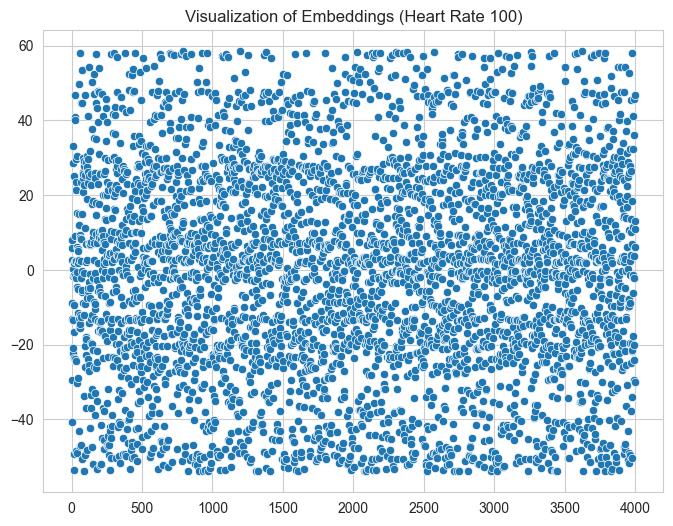

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tempo_do_vetor, y=embedding_tsne.flatten())
plt.title('Visualization of Embeddings (Heart Rate 100)')
plt.show()

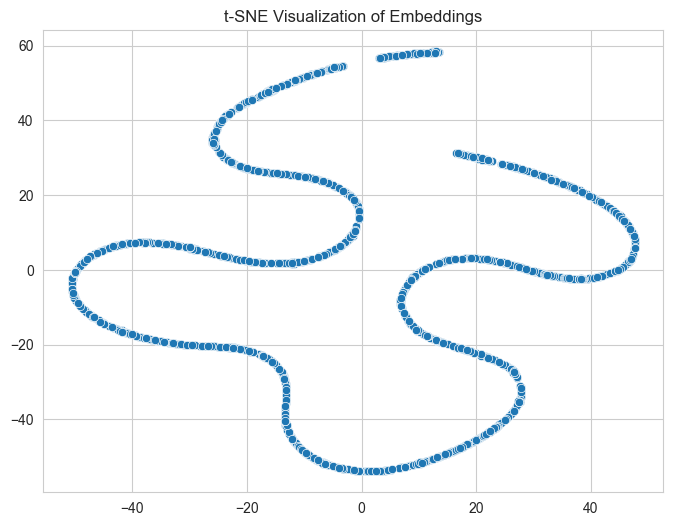

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedding_tsne[:, 0], y=embedding_tsne[:, 1])
plt.title('t-SNE Visualization of Embeddings')
plt.show()

In [13]:
def plot_embeddings_with_noise_variability():
    duration = 10
    noise_levels = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

    fig, axs = plt.subplots(2, 5, figsize=(20, 8))

    for i, noise in enumerate(noise_levels):
        ecg_data = nk.ecg_simulate(duration=duration, noise=noise, heart_rate=100)
        ecg_df = pd.DataFrame({"ECG": ecg_data})

        train_data, test_data = train_test_split(ecg_df, test_size=0.2, random_state=42)

        input_layer = Input(shape=(1,))
        encoded = Dense(128, activation='relu')(input_layer)
        decoded = Dense(1, activation='sigmoid')(encoded)
        autoencoder = Model(input_layer, decoded)
        autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
        autoencoder.fit(train_data["ECG"], train_data["ECG"], epochs=50, batch_size=32, shuffle=True,
                        validation_data=(test_data["ECG"], test_data["ECG"]))

        embedding_model = Model(inputs=input_layer, outputs=encoded)
        embeddings = embedding_model.predict(test_data["ECG"])

        tsne = TSNE(n_components=2, random_state=42)
        embedding_tsne = tsne.fit_transform(embeddings)

        axs[i // 5, i % 5].scatter(embedding_tsne[:, 0], embedding_tsne[:, 1])
        axs[i // 5, i % 5].set_title(f'Noise: {noise}')

    plt.tight_layout()
    plt.show()

Epoch 1/50
250/250 [==============================] - 0s 607us/step - loss: 0.0602 - val_loss: 0.0112
Epoch 2/50
250/250 [==============================] - 0s 424us/step - loss: 0.0093 - val_loss: 0.0081
Epoch 3/50
250/250 [==============================] - 0s 414us/step - loss: 0.0081 - val_loss: 0.0074
Epoch 4/50
250/250 [==============================] - 0s 419us/step - loss: 0.0076 - val_loss: 0.0071
Epoch 5/50
250/250 [==============================] - 0s 418us/step - loss: 0.0073 - val_loss: 0.0068
Epoch 6/50
250/250 [==============================] - 0s 413us/step - loss: 0.0071 - val_loss: 0.0066
Epoch 7/50
250/250 [==============================] - 0s 417us/step - loss: 0.0069 - val_loss: 0.0065
Epoch 8/50
250/250 [==============================] - 0s 418us/step - loss: 0.0068 - val_loss: 0.0064
Epoch 9/50
250/250 [==============================] - 0s 414us/step - loss: 0.0068 - val_loss: 0.0064
Epoch 10/50
250/250 [==============================] - 0s 411us/step - loss: 0.006

Epoch 1/50
250/250 [==============================] - 0s 562us/step - loss: 0.0593 - val_loss: 0.0102
Epoch 2/50
250/250 [==============================] - 0s 413us/step - loss: 0.0084 - val_loss: 0.0079
Epoch 3/50
250/250 [==============================] - 0s 412us/step - loss: 0.0074 - val_loss: 0.0073
Epoch 4/50
250/250 [==============================] - 0s 414us/step - loss: 0.0070 - val_loss: 0.0070
Epoch 5/50
250/250 [==============================] - 0s 412us/step - loss: 0.0066 - val_loss: 0.0067
Epoch 6/50
250/250 [==============================] - 0s 415us/step - loss: 0.0064 - val_loss: 0.0064
Epoch 7/50
250/250 [==============================] - 0s 413us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 8/50
250/250 [==============================] - 0s 413us/step - loss: 0.0060 - val_loss: 0.0061
Epoch 9/50
250/250 [==============================] - 0s 409us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 10/50
250/250 [==============================] - 0s 411us/step - loss: 0.005

Epoch 1/50
250/250 [==============================] - 0s 565us/step - loss: 0.0549 - val_loss: 0.0107
Epoch 2/50
250/250 [==============================] - 0s 426us/step - loss: 0.0086 - val_loss: 0.0080
Epoch 3/50
250/250 [==============================] - 0s 478us/step - loss: 0.0075 - val_loss: 0.0073
Epoch 4/50
250/250 [==============================] - 0s 411us/step - loss: 0.0070 - val_loss: 0.0069
Epoch 5/50
250/250 [==============================] - 0s 411us/step - loss: 0.0067 - val_loss: 0.0067
Epoch 6/50
250/250 [==============================] - 0s 419us/step - loss: 0.0065 - val_loss: 0.0065
Epoch 7/50
250/250 [==============================] - 0s 412us/step - loss: 0.0064 - val_loss: 0.0064
Epoch 8/50
250/250 [==============================] - 0s 410us/step - loss: 0.0063 - val_loss: 0.0064
Epoch 9/50
250/250 [==============================] - 0s 409us/step - loss: 0.0062 - val_loss: 0.0063
Epoch 10/50
250/250 [==============================] - 0s 409us/step - loss: 0.006

Epoch 1/50
250/250 [==============================] - 0s 570us/step - loss: 0.0645 - val_loss: 0.0114
Epoch 2/50
250/250 [==============================] - 0s 419us/step - loss: 0.0098 - val_loss: 0.0084
Epoch 3/50
250/250 [==============================] - 0s 415us/step - loss: 0.0087 - val_loss: 0.0078
Epoch 4/50
250/250 [==============================] - 0s 415us/step - loss: 0.0081 - val_loss: 0.0074
Epoch 5/50
250/250 [==============================] - 0s 414us/step - loss: 0.0077 - val_loss: 0.0070
Epoch 6/50
250/250 [==============================] - 0s 414us/step - loss: 0.0074 - val_loss: 0.0068
Epoch 7/50
250/250 [==============================] - 0s 410us/step - loss: 0.0072 - val_loss: 0.0066
Epoch 8/50
250/250 [==============================] - 0s 413us/step - loss: 0.0071 - val_loss: 0.0065
Epoch 9/50
250/250 [==============================] - 0s 406us/step - loss: 0.0070 - val_loss: 0.0065
Epoch 10/50
250/250 [==============================] - 0s 406us/step - loss: 0.006

Epoch 1/50
250/250 [==============================] - 0s 567us/step - loss: 0.0498 - val_loss: 0.0096
Epoch 2/50
250/250 [==============================] - 0s 418us/step - loss: 0.0072 - val_loss: 0.0074
Epoch 3/50
250/250 [==============================] - 0s 416us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 4/50
250/250 [==============================] - 0s 412us/step - loss: 0.0057 - val_loss: 0.0064
Epoch 5/50
250/250 [==============================] - 0s 412us/step - loss: 0.0054 - val_loss: 0.0061
Epoch 6/50
250/250 [==============================] - 0s 409us/step - loss: 0.0052 - val_loss: 0.0060
Epoch 7/50
250/250 [==============================] - 0s 403us/step - loss: 0.0051 - val_loss: 0.0058
Epoch 8/50
250/250 [==============================] - 0s 408us/step - loss: 0.0050 - val_loss: 0.0057
Epoch 9/50
250/250 [==============================] - 0s 410us/step - loss: 0.0049 - val_loss: 0.0057
Epoch 10/50
250/250 [==============================] - 0s 410us/step - loss: 0.004

Epoch 1/50
250/250 [==============================] - 0s 582us/step - loss: 0.0590 - val_loss: 0.0113
Epoch 2/50
250/250 [==============================] - 0s 417us/step - loss: 0.0093 - val_loss: 0.0088
Epoch 3/50
250/250 [==============================] - 0s 414us/step - loss: 0.0082 - val_loss: 0.0082
Epoch 4/50
250/250 [==============================] - 0s 520us/step - loss: 0.0077 - val_loss: 0.0078
Epoch 5/50
250/250 [==============================] - 0s 417us/step - loss: 0.0074 - val_loss: 0.0075
Epoch 6/50
250/250 [==============================] - 0s 418us/step - loss: 0.0071 - val_loss: 0.0072
Epoch 7/50
250/250 [==============================] - 0s 417us/step - loss: 0.0069 - val_loss: 0.0071
Epoch 8/50
250/250 [==============================] - 0s 409us/step - loss: 0.0068 - val_loss: 0.0070
Epoch 9/50
250/250 [==============================] - 0s 415us/step - loss: 0.0067 - val_loss: 0.0069
Epoch 10/50
250/250 [==============================] - 0s 477us/step - loss: 0.006

Epoch 1/50
250/250 [==============================] - 0s 673us/step - loss: 0.0546 - val_loss: 0.0103
Epoch 2/50
250/250 [==============================] - 0s 436us/step - loss: 0.0081 - val_loss: 0.0077
Epoch 3/50
250/250 [==============================] - 0s 561us/step - loss: 0.0068 - val_loss: 0.0070
Epoch 4/50
250/250 [==============================] - 0s 427us/step - loss: 0.0063 - val_loss: 0.0066
Epoch 5/50
250/250 [==============================] - 0s 410us/step - loss: 0.0061 - val_loss: 0.0064
Epoch 6/50
250/250 [==============================] - 0s 408us/step - loss: 0.0059 - val_loss: 0.0063
Epoch 7/50
250/250 [==============================] - 0s 412us/step - loss: 0.0058 - val_loss: 0.0062
Epoch 8/50
250/250 [==============================] - 0s 406us/step - loss: 0.0057 - val_loss: 0.0061
Epoch 9/50
250/250 [==============================] - 0s 409us/step - loss: 0.0056 - val_loss: 0.0060
Epoch 10/50
250/250 [==============================] - 0s 407us/step - loss: 0.005

Epoch 1/50
250/250 [==============================] - 0s 556us/step - loss: 0.0566 - val_loss: 0.0108
Epoch 2/50
250/250 [==============================] - 0s 418us/step - loss: 0.0090 - val_loss: 0.0083
Epoch 3/50
250/250 [==============================] - 0s 410us/step - loss: 0.0078 - val_loss: 0.0077
Epoch 4/50
250/250 [==============================] - 0s 411us/step - loss: 0.0074 - val_loss: 0.0073
Epoch 5/50
250/250 [==============================] - 0s 612us/step - loss: 0.0071 - val_loss: 0.0071
Epoch 6/50
250/250 [==============================] - 0s 489us/step - loss: 0.0069 - val_loss: 0.0070
Epoch 7/50
250/250 [==============================] - 0s 417us/step - loss: 0.0068 - val_loss: 0.0069
Epoch 8/50
250/250 [==============================] - 0s 415us/step - loss: 0.0067 - val_loss: 0.0068
Epoch 9/50
250/250 [==============================] - 0s 416us/step - loss: 0.0066 - val_loss: 0.0067
Epoch 10/50
250/250 [==============================] - 0s 581us/step - loss: 0.006

Epoch 1/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0624 - val_loss: 0.0130
Epoch 2/50
250/250 [==============================] - 0s 459us/step - loss: 0.0109 - val_loss: 0.0105
Epoch 3/50
250/250 [==============================] - 0s 425us/step - loss: 0.0098 - val_loss: 0.0099
Epoch 4/50
250/250 [==============================] - 0s 420us/step - loss: 0.0094 - val_loss: 0.0095
Epoch 5/50
250/250 [==============================] - 0s 433us/step - loss: 0.0090 - val_loss: 0.0092
Epoch 6/50
250/250 [==============================] - 0s 423us/step - loss: 0.0088 - val_loss: 0.0090
Epoch 7/50
250/250 [==============================] - 0s 422us/step - loss: 0.0086 - val_loss: 0.0088
Epoch 8/50
250/250 [==============================] - 0s 419us/step - loss: 0.0084 - val_loss: 0.0087
Epoch 9/50
250/250 [==============================] - 0s 430us/step - loss: 0.0083 - val_loss: 0.0086
Epoch 10/50
250/250 [==============================] - 0s 422us/step - loss: 0.0083 

Epoch 1/50
250/250 [==============================] - 0s 555us/step - loss: 0.0580 - val_loss: 0.0115
Epoch 2/50
250/250 [==============================] - 0s 400us/step - loss: 0.0085 - val_loss: 0.0087
Epoch 3/50
250/250 [==============================] - 0s 394us/step - loss: 0.0073 - val_loss: 0.0080
Epoch 4/50
250/250 [==============================] - 0s 394us/step - loss: 0.0069 - val_loss: 0.0077
Epoch 5/50
250/250 [==============================] - 0s 396us/step - loss: 0.0067 - val_loss: 0.0075
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.0074
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0073
Epoch 8/50
250/250 [==============================] - 0s 890us/step - loss: 0.0063 - val_loss: 0.0072
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0071
Epoch 10/50
250/250 [==============================] - 0s 626us/step - loss: 0.0061 - va

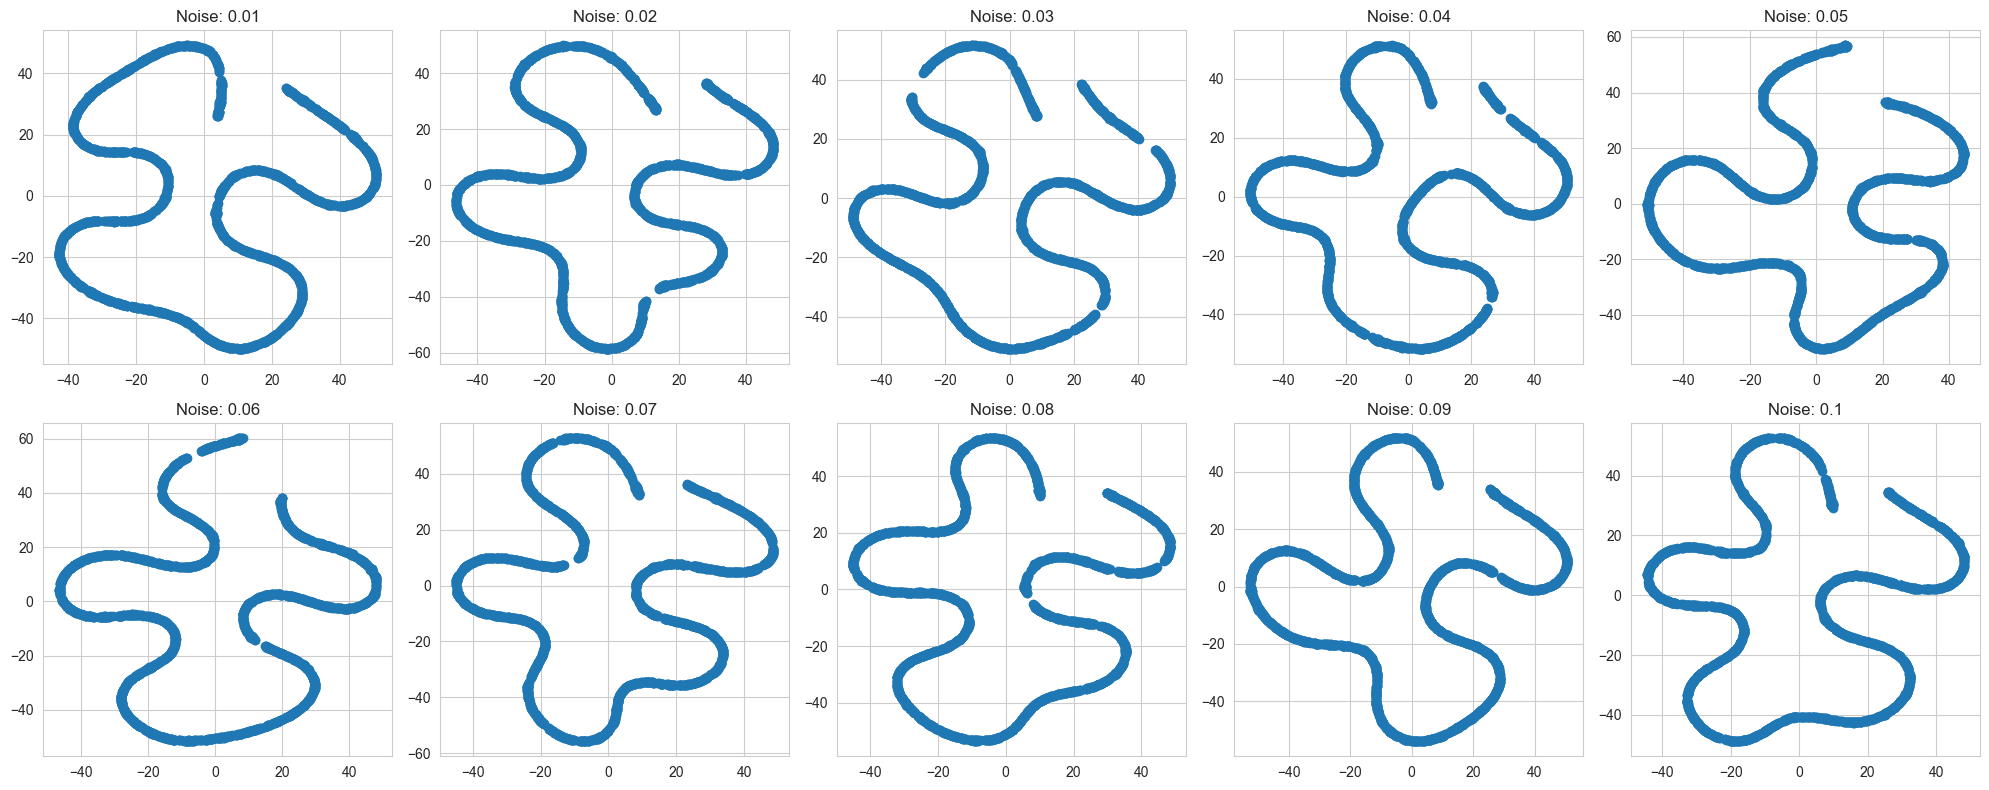

In [14]:
plot_embeddings_with_noise_variability()